# Gradient Descent
## Instructions:
* Go through the notebook and complete the tasks. 
* Make sure you understand the examples given. If you need help, refer to the Essential readings or the documentation link provided, or go to the discussion forum. 
* Save your notebooks when you are done.

This notebook will give you the chance to implement the gradient descent algorithm to solve a linear regression problem. 

The main steps involved will be:

    Within a loop -
    1. Calculate the hypothesis h 
    2. Calculate the loss 
    3. Calculate the gradient descent update 
    4. stop loop when loss falls stops changing


**Task 1:**

The first task is to load the diabetes dataset (from the earlier notebook), select one feature (bmi, the 2nd indexed feature), and split it into a training set (90%) and a test set (10%). Plot the data as a scatter plot.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Select 10% for testing, 90% for training
data_len = len(diabetes.target)
nTestSamples = np.int(0.1*data_len)
idx_test = np.arange(1, nTestSamples)
idx_train = np.arange(idx_test[-1]+1, data_len - idx_test[-1])

# extract the bmi feature
print(diabetes.feature_names[2])
X_diabetes = diabetes.data[:,np.newaxis,2]
X_test = X_diabetes[idx_test]
X_train = X_diabetes[idx_train]
y_test = diabetes.target[idx_test]
y_train = diabetes.target[idx_train]

# (For comparison purposes, create linear regression object)
regr = linear_model.LinearRegression()
# Train the model using the training sets

regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Intercept (theta 0): \n', regr.intercept_)
print('Coefficients (theta 1): \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

bmi
Intercept (theta 0): 
 153.73201108210046
Coefficients (theta 1): 
 [958.76368869]
Mean squared error: 3956.25


<Figure size 640x480 with 1 Axes>

**Task 2:**

Write a suitable hypothesis function, ```h_lin```, that can handle an single feature vector and a corresponding 2D parameter (theta)


In [2]:
def h_lin( X, theta):
    'X should be a data vector, theta the parameters'
    return theta[0] + X*theta[1:]


**Task 3:**

Write a suitable loss function, ```loss_L2```, that calculates the least-squares loss between a given hypothesis and the target value.


In [3]:
def loss_L2( h, y ):
    'Calculate the least-squares loss.' 
    'h is a vector of predictions by the hypothesis function, y is the target'
    return np.mean([ (a-b)**2 for a,b in zip(h.flatten(), y)])

loss_L2(h_lin(X_test,[150, 958]), y_test)

3920.389441551087

**Task 4:**

Write a suitable function to calculate the gradients, ```gradient_batch```, that operates on both the parameters, ```theta[0]``` (the intercept) and ```theta[1]``` (the gradient coefficient). The function is given the data X, and the target, y. 
(Remember the difference in gradient calculationn for the intercept term.)

In [4]:
def gradient_batch(theta, X, y):
    'Calculate the gradients of the loss function for the parameters in theta'
    'Given data X and target y'
    
    grad = [0,0]
    
    h = h_lin(X,theta)
    residuals = [ (a-b) for a,b in zip(h.flatten(), y)]
    
    grad[0] = np.mean(residuals)
    grad[1] = X[:,0].dot(residuals)/len(y) # calculate the mean
    
    return np.array(grad)
    

**Task 5:**

Write the batch gradient descent algorithm that iteratively updates the coefficients (an initially selected set of theta values), and stops once the loss function stops changing much (i.e. by about 0.1) 


In [10]:

# set initial theta values
theta = [100, 100]

# set stopping criterion
loss_stop_threshold = 0.1

# learning rate
alpha = 0.1

def batch_gd( X, y, theta, alpha, loss_stop_threshold):
    # initial loss value
    loss = loss_L2( h_lin(X,theta), y)
    old_loss = loss+loss_stop_threshold

    # loop through 
    while( abs(old_loss - loss) > loss_stop_threshold ):
        #print(loss)

        # gradient descent update rules
        gradients = gradient_batch(theta, X, y)
        
        theta = theta - alpha * gradients            
        
        # update loss values
        old_loss = loss
        loss = loss_L2( h_lin(X,theta), y)
        
    print('GD stopped at loss %s, with coefficients: %s' % (loss,theta))
    return theta
        
theta = batch_gd(X_train, y_train, theta, alpha, loss_stop_threshold)




GD stopped at loss 4197.1493924527995, with coefficients: [153.70863843 639.52517709]


**Task 6:**

Train your algorithm using the training data, then test it using the test set. Compare the performance of your algorithm to the sklearn solution. Have a play with some of the parameters you can tweak, particularly learning rate and stopping criterion.



Intercept (theta 0): 
 153.70863842882753
Coefficients (theta 1): 
 639.5251770853935
Mean squared error: 4160.31


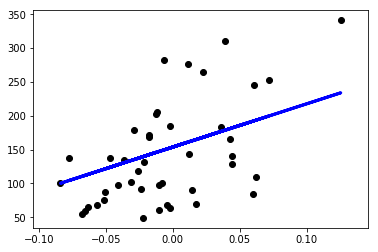

In [11]:

y_pred =  h_lin( X_test, theta)

# The coefficients
print('Intercept (theta 0): \n', theta[0])
print('Coefficients (theta 1): \n', theta[1])

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Plot outputs using test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()
